<a href="https://colab.research.google.com/github/shivangibithel/Assignment3-SVM/blob/main/SVM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Read Data

In [ ]:
def read_data(filename, x, y):
    row_num = 0
    with open(filename, 'r') as f:
        reader = csv.reader(f, delimiter=' ')
        for row in reader:
            k = len(row)
            for strings in range(k):
              if strings == 0:
                  y[row_num][0] = int(row[strings])
              else:
                for i in range(1,9):
                  if (row[strings])[0] == str(i):
                    temp_string = (row[strings])[2:]
                    temp_float = float(temp_string)
                    x[row_num][i-1] = temp_float
            row_num = row_num + 1

    return x, y

In [ ]:
df = pd.read_csv("RNA_train_data.txt", sep= " ",header=None)
count = len(df)
print('No of Records = ', count)
x = np.zeros((count, 8))
    # 8 features per record
y = np.zeros((count, 1))
    # 1 label per record
x, y = read_data('RNA_train_data.txt', x, y)
np.savetxt('train_data.txt',x)
np.savetxt('train_label.txt',y)
print(y)
x[25] # verifies that reading lesser data correctly 

No of Records =  2000
[[ 1.]
 [-1.]
 [-1.]
 ...
 [-1.]
 [-1.]
 [ 1.]]


array([0.901198, 0.908975, 0.131083, 0.      , 1.      , 0.225958,
       0.381718, 0.677109])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.50, random_state=0)
X_train

array([[0.837516, 0.882066, 0.300114, ..., 0.283122, 0.251447, 0.755608],
       [0.874469, 0.364596, 0.128644, ..., 0.12649 , 0.348498, 0.691458],
       [0.75553 , 0.191855, 0.354287, ..., 0.218552, 0.259772, 0.71241 ],
       ...,
       [0.961419, 0.882066, 0.202733, ..., 0.259316, 0.337685, 0.693646],
       [0.860096, 0.882066, 0.339693, ..., 0.211648, 0.222679, 0.817465],
       [0.842522, 0.191855, 0.389589, ..., 0.159685, 0.388361, 0.691458]])

In [ ]:
df = pd.read_csv("RNA_test_data.txt", sep= " ",header=None)    
count_test = len(df)
X_test = np.zeros((count_test, 8))
# 8 features per record
y_test = np.zeros((count_test, 1))
X_test, y_test = read_data('RNA_test_data.txt', X_test, y_test)
np.savetxt('test_data.txt',X_test)
np.savetxt('test_label.txt',y_test)

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

# plotting


In [ ]:
def pca(n_components, x):
    pca_ = PCA(n_components)
    pca_result = pca_.fit_transform(x)
    plt.scatter(pca_result[:, 0], pca_result[:, 1])

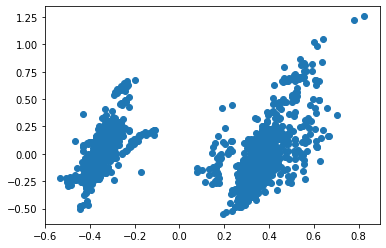

In [ ]:
pca(2, x)

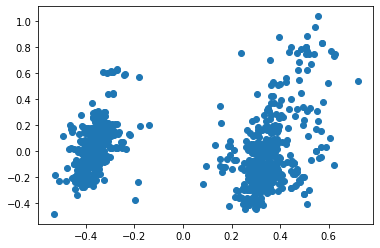

In [ ]:
#  x= x.to_numpy()
pca(2, X_test)

(2000, 2)


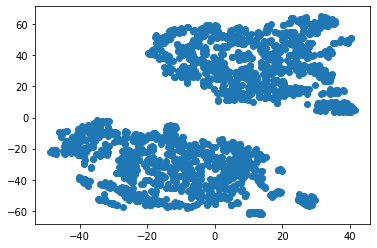

In [ ]:
def tsne(n_components, x):
    x_tsne = TSNE(n_components).fit_transform(x)
    print(x_tsne.shape)
    plt.scatter(x_tsne[:, 0], x_tsne[:, 1])
    plt.show()
    return x_tsne
x_tsne = tsne(2, x)

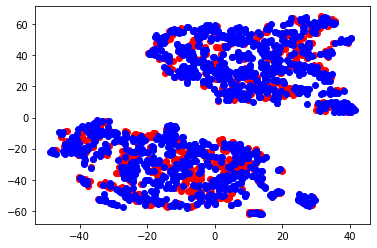

In [ ]:
n_components=2
x_1 = np.zeros((0, n_components))
x_2 = np.zeros((0, n_components))

for i in range(y.shape[0]):
        # print(i)
  if y[i, 0] == 1:
    x_1 = np.append(x_1, x_tsne[i, :])
  else:
    x_2 = np.append(x_2, x_tsne[i, :])

    # reshape(-1,n_components) means that where we have -1, the dimension remains same. x_1.shape --> (same,n_components)
x_1 = x_1.reshape(-1, n_components)
x_2 = x_2.reshape(-1, n_components)

plt.scatter(x_1[:, 0], x_1[:, 1], color='red')
plt.scatter(x_2[:, 0], x_2[:, 1], color='blue')
plt.show()

# Run SVM

first randomly choose 50% of the training set as the cross validation set. Next, divide the cross validation set into 5 subsets of equal size. Each subset is in turn used to validate the classifier trained on the remaining 4 subsets. So you will have 5 trained SVMs and 5 validation subsets. The cross validation accuracy is average accuracy over the 5 validation subsets. (Do not use the built-in cross validation option in LIBSVM). For both C and \sigma try a number of different values and be sure to try all possible of pairs of values for C and \sigma. Show a matrix of your cross validation results, where the entry (i, j) of the matrix corresponds to the classification accuracy on the cross validation set with ith value of C and j th value of \sigma. 


In [ ]:
def svm(C, X_train, y_train, X_valid, y_valid):
    classifier = SVC(C=C, kernel='linear', random_state=0)
    classifier.fit(X_train, y_train.ravel())
    # print(classifier.coef_)
    # print(classifier.intercept_)

    # Predicting the Test set results(TESTING)
    y_pred_valid = classifier.predict(X_valid)

    # Performance(Confusion Matrix and Efficiency)
    cm = confusion_matrix(y_valid, y_pred_valid)
    print("confusion_matrix:\n", cm)

    Accuracy = (cm[0, 0] + cm[1, 1]) / (y_valid.size)
    print(Accuracy)


def optimize_linearK():
    i, max_acc, opt_C, opt_gamma = (0,) * 4
    # C_2d_range = np.logspace(-2, 10, 13)
    # C_2d_range = np.arange(0.01, 100, 0.03)
    C_2d_range = [1e-3, 1e-2, 1e-1, 1, 10, 1e2]
    acc_array = np.zeros((len(C_2d_range), 1))
    c_array = np.zeros((len(C_2d_range), 1))

    for C in C_2d_range:
        classifier = SVC(C=C, kernel='linear', random_state=0)
        classifier.fit(X_train, y_train.ravel())
        y_pred_valid = classifier.predict(X_valid)
        cm = confusion_matrix(y_valid, y_pred_valid)
        Accuracy = (cm[0, 0] + cm[1, 1]) / (y_valid.size)
        # print (Accuracy)
        acc_array[i, 0] = Accuracy * 100
        c_array[i, 0] = C
        if Accuracy > max_acc:
            max_acc = Accuracy
            opt_C = C
        i = i + 1

    print("Maximum Accuracy : ", max_acc)
    print("Optimal Value of C is : ", opt_C)

    plt.plot(acc_array)
    plt.show()
    return opt_C

Maximum Accuracy :  0.948
Optimal Value of C is :  0.1


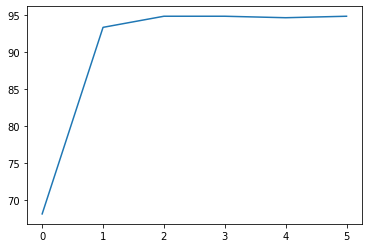

confusion_matrix:
 [[647  34]
 [ 18 301]]
0.948


In [ ]:
opt_C = optimize_linearK()
svm(opt_C, X_train, y_train, X_valid, y_valid)

In [ ]:
def optimize_rbf():
    C_2d_range = [1, 10, 50, 100, 150]
    gamma_2d_range = [1e-2, 1e-1, 1, 1e1, 1e+2]

    m1 = len(C_2d_range)

    acc_mat = np.zeros((m1, m1))
    i, j, max_acc, opt_gamma = (0,) * 4

    for C in C_2d_range:
        j = 0
        for gamma in gamma_2d_range:
            Avg_Acc = 0
            kf = KFold(n_splits=5, random_state=None, shuffle=False)
            for train_index, test_index in kf.split(x):
                X_train, X_valid = x[train_index], x[test_index]
                y_train, y_valid = y[train_index], y[test_index]

                classifier = SVC(C=C, gamma=gamma, kernel='rbf', random_state=0)
                classifier.fit(X_train, y_train.ravel())

                y_pred_valid = classifier.predict(X_valid)

                cm = confusion_matrix(y_valid, y_pred_valid)

                Accuracy = (cm[0, 0] + cm[1, 1]) / (y_valid.size)

                Avg_Acc = Avg_Acc + Accuracy
            # why 100??
            Avg_Acc = Avg_Acc / 5
            print("Set Avg Acc = ", Avg_Acc * 100)
            # print(i,"   ",j)
            acc_mat[i][j] = (Avg_Acc) * 100
            if Avg_Acc * 100 > max_acc:
                max_acc = acc_mat[i][j]
                opt_C = C
                opt_gamma = gamma
            j = j + 1
        i = i + 1
    print(acc_mat)
    print("Maximum Accuracy : ", max_acc)
    print("Optimal Value of C is : ", opt_C)
    print("Optimal Value of Gamma : ", opt_gamma)
    print("Optimal Value of Sigma : ", np.sqrt(np.divide(1, 2 * opt_gamma)))

    plt.plot(acc_mat[:, 0])
    plt.show()
    return opt_C, opt_gamma

Set Avg Acc =  93.6
Set Avg Acc =  93.5
Set Avg Acc =  88.5
Set Avg Acc =  69.19999999999999
Set Avg Acc =  68.0
Set Avg Acc =  94.5
Set Avg Acc =  93.5
Set Avg Acc =  87.6
Set Avg Acc =  70.19999999999999
Set Avg Acc =  68.0
Set Avg Acc =  94.5
Set Avg Acc =  93.30000000000001
Set Avg Acc =  87.7
Set Avg Acc =  70.19999999999999
Set Avg Acc =  68.0
Set Avg Acc =  94.39999999999999
Set Avg Acc =  92.30000000000001
Set Avg Acc =  87.89999999999999
Set Avg Acc =  70.19999999999999
Set Avg Acc =  68.0
Set Avg Acc =  94.5
Set Avg Acc =  91.90000000000002
Set Avg Acc =  87.89999999999999
Set Avg Acc =  70.19999999999999
Set Avg Acc =  68.0
[[93.6 93.5 88.5 69.2 68. ]
 [94.5 93.5 87.6 70.2 68. ]
 [94.5 93.3 87.7 70.2 68. ]
 [94.4 92.3 87.9 70.2 68. ]
 [94.5 91.9 87.9 70.2 68. ]]
Maximum Accuracy :  94.5
Optimal Value of C is :  10
Optimal Value of Gamma :  0.01
Optimal Value of Sigma :  7.0710678118654755


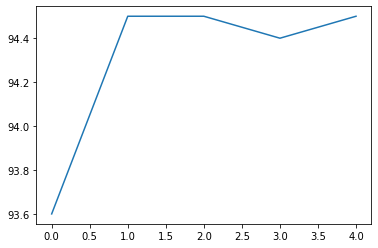

Corresponding Optimal Intercept :  [1.67642077]


In [ ]:
# parameter tuning for RBF kernel (PART B)
x=X_valid
y=y_valid
opt_C, opt_gamma = optimize_rbf()
classifier = SVC(C=opt_C, gamma=opt_gamma, kernel='rbf', random_state=0)
classifier.fit(X_train, y_train.ravel())
print('Corresponding Optimal Intercept : ', classifier.intercept_)
y_pred_test = classifier.predict(X_test)

In [ ]:
# DataSet1 = pd.DataFrame(X_valid)
# DataSet2 =pd.DataFrame(y_valid)
# DataSet = pd.concat([DataSet1, DataSet2],axis=1, ignore_index=True, sort=False)
# DataSet.head(2)

Set Avg Acc =  93.6
Set Avg Acc =  93.5
Set Avg Acc =  88.5
Set Avg Acc =  69.19999999999999
Set Avg Acc =  68.0
Set Avg Acc =  94.5
Set Avg Acc =  93.5
Set Avg Acc =  87.6
Set Avg Acc =  70.19999999999999
Set Avg Acc =  68.0
Set Avg Acc =  94.5
Set Avg Acc =  93.30000000000001
Set Avg Acc =  87.7
Set Avg Acc =  70.19999999999999
Set Avg Acc =  68.0
Set Avg Acc =  94.39999999999999
Set Avg Acc =  92.30000000000001
Set Avg Acc =  87.89999999999999
Set Avg Acc =  70.19999999999999
Set Avg Acc =  68.0
Set Avg Acc =  94.5
Set Avg Acc =  91.90000000000002
Set Avg Acc =  87.89999999999999
Set Avg Acc =  70.19999999999999
Set Avg Acc =  68.0
[[93.6 93.5 88.5 69.2 68. ]
 [94.5 93.5 87.6 70.2 68. ]
 [94.5 93.3 87.7 70.2 68. ]
 [94.4 92.3 87.9 70.2 68. ]
 [94.5 91.9 87.9 70.2 68. ]]
Maximum Accuracy :  94.5
Optimal Value of C is :  10
Optimal Value of Gamma :  0.01
Optimal Value of Sigma :  7.0710678118654755


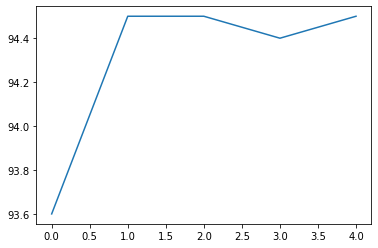

Corresponding Optimal Intercept :  [1.67642077]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# x_columns = np.r_[0:8]
# X = DataSet.iloc[:, x_columns].values  # X feature vector
X=pd.DataFrame(X_valid)
C_2d_range = [1, 10, 50, 100, 150]
gamma_2d_range = [1e-2, 1e-1, 1, 1e1, 1e+2]

m1 = len(C_2d_range)

acc_mat = np.zeros((m1, m1))
q, p, max_acc, opt_gamma = 0,0,0,0

for C in C_2d_range:
  p = 0
  for gamma in gamma_2d_range:
    Avg_Acc = 0
    k=5
    ss = int(X.shape[0] / k)
    for i in range(k):
      # x_kfold_ss = k-fold subset(ss) form X data
      # i * ss = start of index in loop
      # (i+1) * ss = end of loop
      #  ss is just length divided by k folds
      x_kfold_test = DataSet.iloc[i * ss: (i + 1) * ss, x_columns].values  # Test subset
      x_kfold_train = DataSet.iloc[np.r_[0: i * ss, (i+1) * ss: k * ss], x_columns].values  # Training subset (
      # larger in size). It is combination of two subsets;
      # 1) Previous to test set, starting from Zero (0: i * ss),
      # 2) After test set till the end k ((i+1) * ss: k * ss)
      y_kfold_test = DataSet.iloc[i * ss: (i + 1) * ss, len(DataSet.columns) - 1].values  # Test Y
      y_kfold_train = DataSet.iloc[np.r_[0: i * ss, (i+1) * ss: k * ss], len(DataSet.columns) - 1].values  # Training Y
      # print(x_kfold_test[1], y_kfold_test[1])  # Diagnostic Check if data is actually changing
      # print(x_kfold_train.shape, x_kfold_test.shape)  # Diagnostic check shapes
      classifier = SVC(C=C, gamma=gamma, kernel='rbf', random_state=0)
      classifier.fit(x_kfold_train, y_kfold_train.ravel())
      y_kfold_pred = classifier.predict(x_kfold_test)
      cm = confusion_matrix(y_kfold_test, y_kfold_pred)
      Accuracy = (cm[0, 0] + cm[1, 1]) / (y_kfold_test.size)
      Avg_Acc = Avg_Acc + Accuracy
    Avg_Acc = Avg_Acc / 5
    print("Set Avg Acc = ", Avg_Acc * 100)
    acc_mat[q][p] = (Avg_Acc) * 100
    if Avg_Acc * 100 > max_acc:
      max_acc = acc_mat[q][p]
      opt_C = C
      opt_gamma = gamma
    p=p+1
  q=q+1
print(acc_mat)
print("Maximum Accuracy : ", max_acc)
print("Optimal Value of C is : ", opt_C)
print("Optimal Value of Gamma : ", opt_gamma)
print("Optimal Value of Sigma : ", np.sqrt(np.divide(1, 2 * opt_gamma)))
# print(acc_mat)
plt.plot(acc_mat[:, 0])
plt.show()
classifier = SVC(C=opt_C, gamma=opt_gamma, kernel='rbf', random_state=0)
classifier.fit(X_train, y_train.ravel())
print('Corresponding Optimal Intercept : ', classifier.intercept_)
y_pred_test = classifier.predict(X_test)